## 1. **EDA**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)  # Agar semua kolom ditampilkan
import matplotlib.ticker as ticker  # Untuk atur jumlah tick


**1.1 Memuat dan Menampilkan Informasi Awal Dataset**

In [136]:
#Membaca Dataset
df= pd.read_csv('ObesityDataSet.csv')

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ObesityDataSet.csv')

In [139]:
df.head() #head() menunjukkan preview data.

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [140]:
# Informasi umum
print(df.info()) #info() memberikan tipe data, jumlah null.

# Statistik deskriptif untuk kolom numerik
print(df.describe()) #describe() untuk melihat ringkasan statistik fitur numerik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

**1.2 Visualisasi Data**

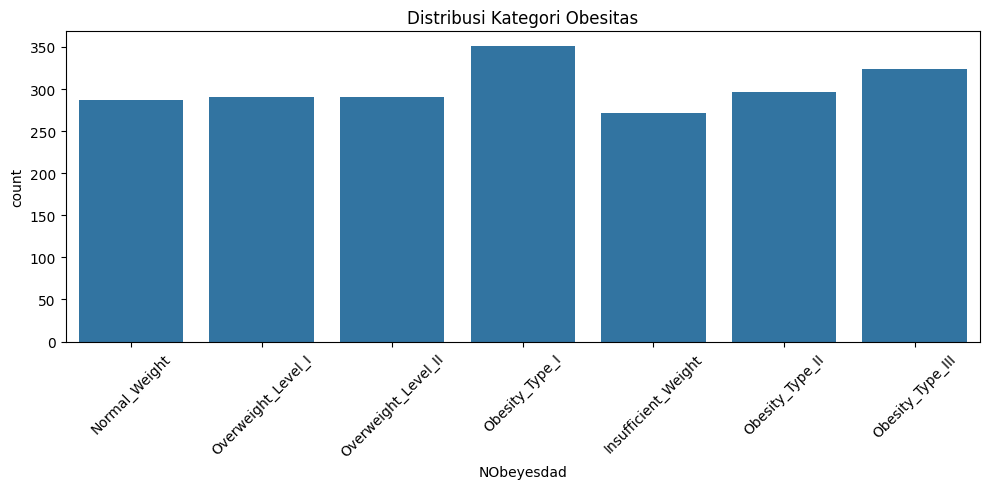

In [141]:
# Distribusi target (Obesity Level)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad')
plt.title("Distribusi Kategori Obesitas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [142]:
# Korelasi fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

**1.3 Cek Missing Values, Nilai Unik, Duplikat, Keseimbangan Data, dan Outlier**

In [143]:
print('\nMissing values per kolom:')
print(df.isna().sum())
print('\nDuplicate rows:', df.duplicated().sum())
print('\nUnique per kolom:')
print(df.nunique())
print('\nClass balance:')
print(df['NObeyesdad'].value_counts(normalize=True))


Missing values per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Duplicate rows: 18

Unique per kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                

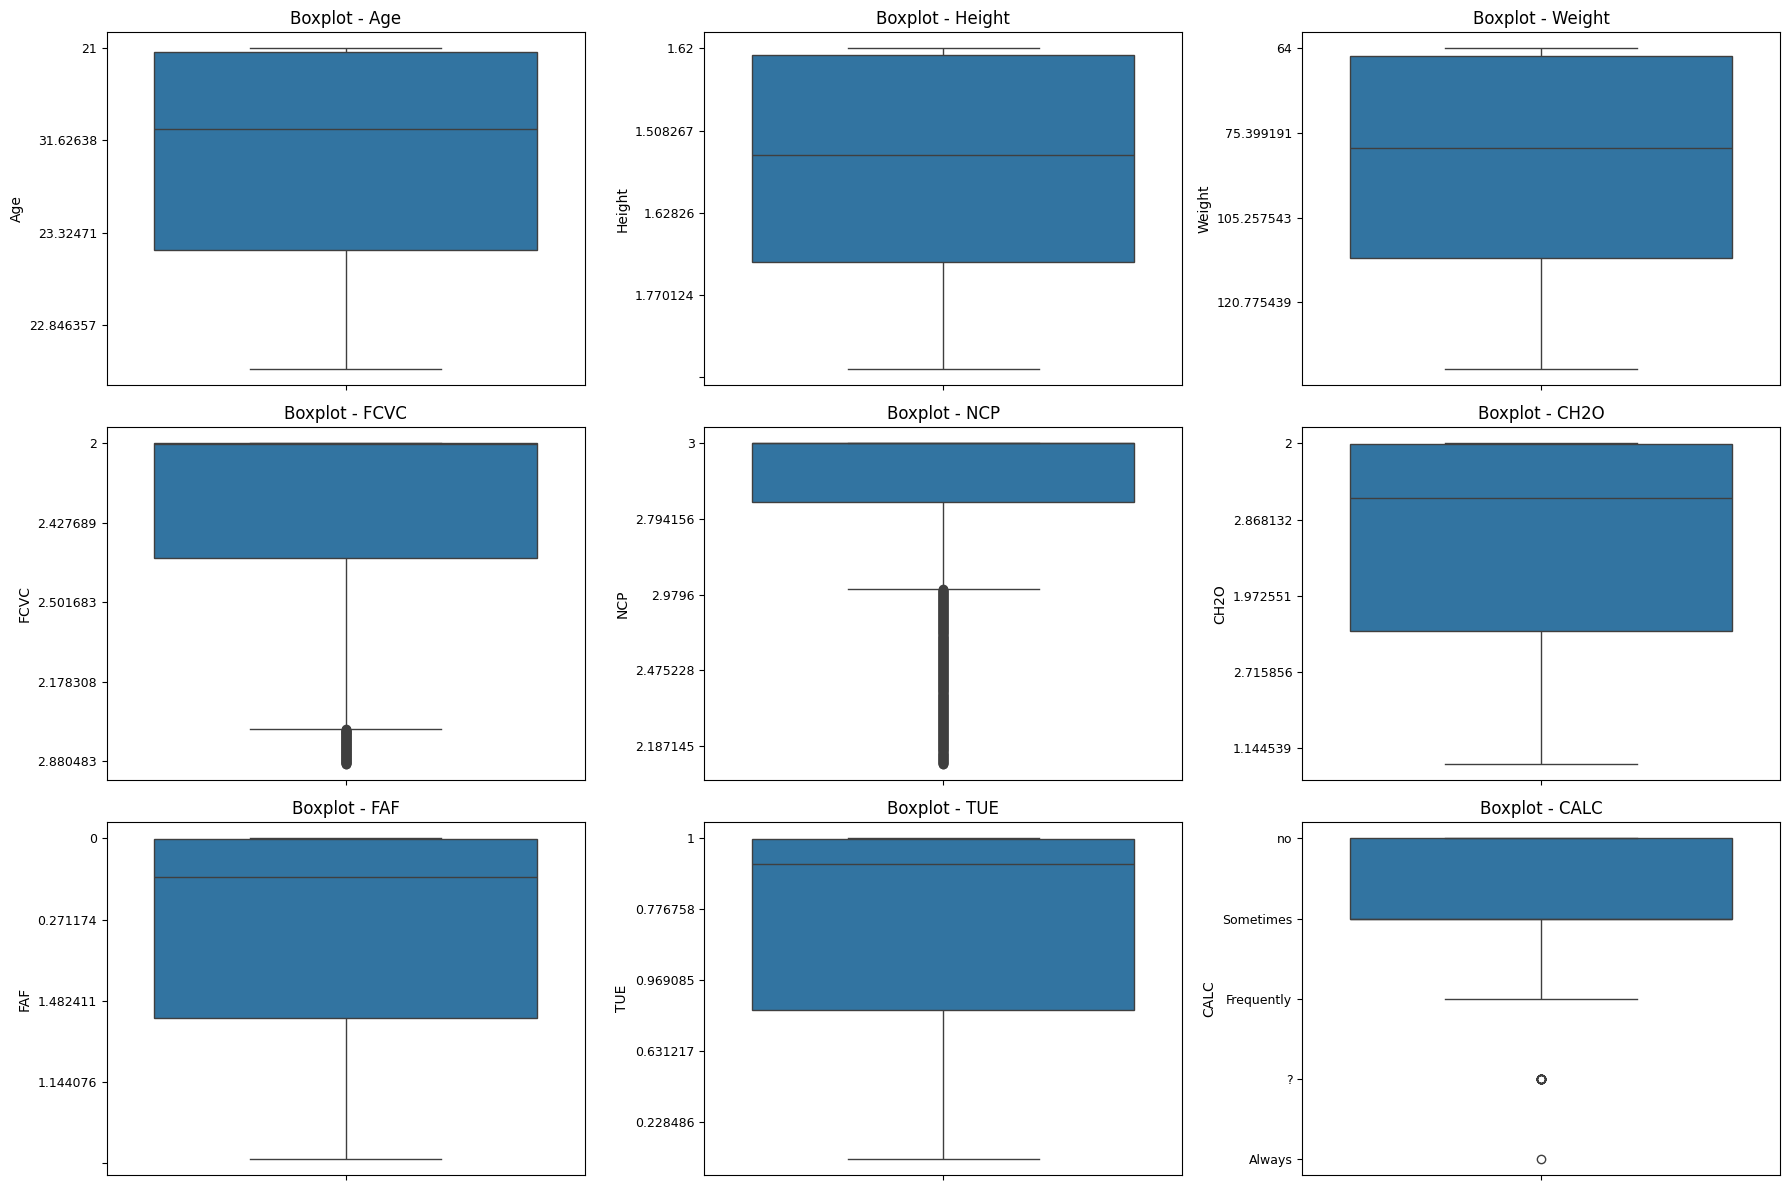

In [144]:
# Daftar kolom numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC']

# Membuat subplot
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')

    # Batasi jumlah label sumbu-Y agar tidak bertumpuk
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))  # max 5 label

    # (Opsional) Ukuran font label bisa dikecilkan juga
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

**Kesimpulan EDA:
Berdasarkan EDA awal, dapat disimpulkan:**

*   Dataset memiliki 17 fitur + 1 target (NObeyesdad).
*   Data tidak mengandung missing values.
*   Terdapat data duplikat jika ditemukan oleh kode.
*   Terdapat ketidakseimbangan kelas pada target (misalnya kelas tertentu lebih dominan).
*   Beberapa fitur numerik memiliki outlier, yang bisa berpengaruh pada model jika tidak ditangani.

### **2. Preprocessing Data**

**2.1 Tangani Missing Values, Duplikasi, dan Outlier**

In [146]:
print(df.isnull().sum())
df.dropna(inplace=True)  # Hapus baris dengan NaN jika jumlahnya sedikit
df.drop_duplicates(inplace=True)

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [148]:
# Daftar kolom yang seharusnya numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi ke float
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek kembali apakah sudah terkonversi
print(df[numerical_columns].dtypes)


Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object


In [152]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['Weight', 'Height', 'Age']:
    df = remove_outliers_iqr(df, col)